In [1]:
from graspy.simulations import er_nm, er_np
from graspy.simulations import sbm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
%matplotlib inline


In [2]:
n = 100
p = 0.4 ## prob of edge existing 
np.random.seed(1)
G1 = er_np(n=n, p=p)
zeros = G1[G1 ==0]

In [3]:

def edgeDistribution(graph, mean, var): 
    for index, x in np.ndenumerate(graph):
        if x == 1:
            graph[index] = np.random.normal(mean,var) ##just use standard normal
    return(graph)

In [4]:
G1 = edgeDistribution(G1, 0,1)
G1

array([[ 0.        , -0.60735181,  0.        , ...,  0.        ,
         0.        , -0.14037099],
       [ 0.14164167,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.06152691],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.40334744],
       [-2.502177  ,  0.61644834,  0.        , ...,  0.        ,
         0.59709506,  0.        ]])

In [5]:
def probZero(graphs,shape):
    prob = ((graphs == 0).sum())/(shape**2) ##1st sum how many zeros and then to find prob, divide total number of edges
    return(prob) 

In [6]:
prob = probZero(graphs = G1, shape = G1.shape[0])
prob

0.6054

In [7]:
normalValues = G1[G1 != 0] 
normalValues = np.reshape(normalValues, (-1, 1))

In [8]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(normalValues)
log_dens = kde.score_samples(normalValues)

(1000, 1)
(3946, 1)


Text(-3.5, 0.31, 'Gaussian Kernel Density')

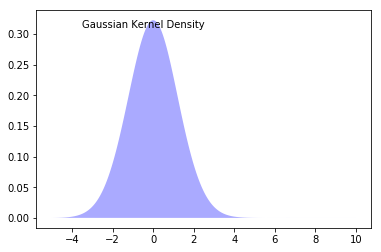

In [9]:
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
X = normalValues
print(X_plot.shape)
print(X.shape)

fig, ax = plt.subplots()

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax.text(-3.5, 0.31, "Gaussian Kernel Density")


No handles with labels found to put in legend.


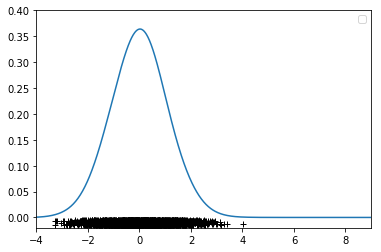

In [12]:


X = normalValues

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]


fig, ax = plt.subplots()



kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)
ax.plot(X_plot[:, 0], np.exp(log_dens), '-')



ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

### To make sure I understood it correctly:
We fit KDE on out data and then sample so random numbers from the distribution. Plot the random samples and their scores to get the pic of the distribution? I followed sklearn example as closely as I could and this is what I understood :|